# Task 2. Predictive Analytics

# Tasks

1. Using the same transaction dataset, identify the annual salary for each customer

2. Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

3. Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

4. How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

5. For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [5]:
# pip install jupyterthemes

In [ ]:
# conda install -c conda-forge jupyterthemes

In [ ]:
# conda update jupyterthemes

In [4]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [5]:
!jt -t solarizedl

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [48]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [8]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 72D0-BC6E

 Directory of C:\Users\GIS\Documents\A.Udemy\Python\dataANZ

05/10/2021  09:17 AM    <DIR>          .
05/10/2021  09:17 AM    <DIR>          ..
05/10/2021  08:52 AM    <DIR>          .ipynb_checkpoints
04/10/2021  04:15 PM           450,495 1_DataANZ_Virtual_Internship_Program.ipynb
03/10/2021  12:59 PM           330,622 1_DataANZ_Virtual_Internship_Program-Copy1.ipynb
03/10/2021  03:49 PM           464,612 1_DataANZ_Virtual_Internship_Program-Copy2.ipynb
01/10/2021  03:25 PM         1,782,724 ANZ synthesised transaction dataset.xlsx
01/10/2021  09:46 PM            17,348 DataANZ.docx
04/10/2021  04:15 PM           338,561 Taks_1_DataANZ_Virtual_Internship_Program_Submit.ipynb
05/10/2021  09:17 AM           456,452 Task_2_Predictive Analytics.ipynb
               7 File(s)      3,840,814 bytes
               3 Dir(s)  38,998,388,736 bytes free


In [9]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 500

In [54]:
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# 1. Indeitfy the annual salary for each customer

In [57]:
df['month_name'] = df['date'].dt.month_name()

In [58]:
cust_salary = pd.DataFrame(df.groupby(['txn_description', 'customer_id', 'month_name'])['amount'].sum())

# Leave PAY/SALARY and drop the other description values
cust_salary = cust_salary.drop(['INTER BANK', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS']).reset_index()
cust_salary.head(10)

,txn_description,customer_id,month_name,amount
0,PAY/SALARY,CUS-1005756958,August,3881.88
1,PAY/SALARY,CUS-1005756958,October,4852.35
2,PAY/SALARY,CUS-1005756958,September,3881.88
3,PAY/SALARY,CUS-1117979751,August,7157.30
4,PAY/SALARY,CUS-1117979751,October,10735.95
5,PAY/SALARY,CUS-1117979751,September,7157.30
6,PAY/SALARY,CUS-1140341822,August,3833.02
7,PAY/SALARY,CUS-1140341822,October,3833.02
8,PAY/SALARY,CUS-1140341822,September,3833.02
9,PAY/SALARY,CUS-1147642491,August,6845.56


In [59]:
uni_cust = cust_salary['customer_id'].unique()
min_salary = []

# Select all the three months' salreis, find the min and save it into min_salary
for cust in range(len(uni_cust)):
    temp_salary = cust_salary['amount'][cust_salary['customer_id'] == uni_cust[cust]].values.min()
    min_salary.append(temp_salary)
    
# Group by txn_description and customier_id to remove month_name, drop amount and add month_salary. 
cust_salary = cust_salary.groupby(['txn_description', 'customer_id'])['amount'].sum().reset_index().drop(columns = 'amount')
cust_salary['month_salary'] = min_salary

Now, I have monthly salary for each customer. I'm going to multiple 12 for annual salary.

In [60]:
cust_salary.head()

,txn_description,customer_id,month_salary
0,PAY/SALARY,CUS-1005756958,3881.88
1,PAY/SALARY,CUS-1117979751,7157.30
2,PAY/SALARY,CUS-1140341822,3833.02
3,PAY/SALARY,CUS-1147642491,6845.56
4,PAY/SALARY,CUS-1196156254,7807.46


In [61]:
# Add anuual_salary 
cust_salary['annual_salary'] = cust_salary['month_salary'] * 12
print('')
print('Number of unique customers in df: {} and cust_salary {}' .format(df['customer_id'].nunique(), cust_salary['customer_id'].nunique()))
cust_salary


Number of unique customers in df: 100 and cust_salary 100


,txn_description,customer_id,month_salary,annual_salary
0,PAY/SALARY,CUS-1005756958,3881.88,46582.56
1,PAY/SALARY,CUS-1117979751,7157.30,85887.60
2,PAY/SALARY,CUS-1140341822,3833.02,45996.24
3,PAY/SALARY,CUS-1147642491,6845.56,82146.72
4,PAY/SALARY,CUS-1196156254,7807.46,93689.52
5,PAY/SALARY,CUS-1220154422,4564.72,54776.64
6,PAY/SALARY,CUS-1233833708,2385.32,28623.84
7,PAY/SALARY,CUS-1271030853,4632.60,55591.20
8,PAY/SALARY,CUS-127297539,4555.16,54661.92
9,PAY/SALARY,CUS-134193016,4047.36,48568.32


# 2. Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

In [62]:
cust_age = pd.DataFrame(df.groupby(['customer_id', 'age'])['age'].count()).drop(columns = 'age').reset_index()

# Check if the order of customer_id in both datasets is not the same. 
for i in range(len(cust_salary)):
    if cust_salary['customer_id'][i] != cust_age['customer_id'][i]:
        print(f'Customer ID doesn\'t match = {i}')  

In [63]:
cust_salary['age'] = cust_age['age']
cust_salary.head()

,txn_description,customer_id,month_salary,annual_salary,age
0,PAY/SALARY,CUS-1005756958,3881.88,46582.56,53
1,PAY/SALARY,CUS-1117979751,7157.30,85887.60,21
2,PAY/SALARY,CUS-1140341822,3833.02,45996.24,28
3,PAY/SALARY,CUS-1147642491,6845.56,82146.72,34
4,PAY/SALARY,CUS-1196156254,7807.46,93689.52,34


               month_salary  annual_salary      age
month_salary        1.00000        1.00000 -0.06313
annual_salary       1.00000        1.00000 -0.06313
age                -0.06313       -0.06313  1.00000


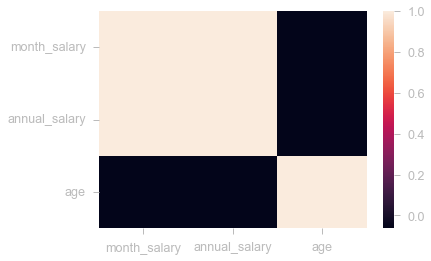

In [64]:
print(cust_salary.corr())
sns.heatmap(cust_salary.corr())
plt.show()


In [65]:
# Add balance and amount
cust_salary['balance'] = df.groupby('customer_id')['balance'].sum().values
cust_salary['amount'] = df.groupby('customer_id')['amount'].sum().values

In [66]:
# Extract txn_description subcategories and unstack them.
cust_txn = pd.DataFrame(df.groupby(['customer_id', 'txn_description'])['txn_description'].count()).unstack().fillna(0).reset_index()

# Check if the order of customer_id in both datasets is not the same. 
for i in range(len(cust_salary)):
    if cust_salary['customer_id'][i] != cust_txn['customer_id'][i]:
        print(f'Customer ID doesn\'t match = {i}')  

In [67]:
cust_txn.head()

customer_id txn_description                                \
txn_description                      INTER BANK PAY/SALARY PAYMENT PHONE BANK   
0                CUS-1005756958             0.0       13.0     9.0        3.0   
1                CUS-1117979751             1.0        7.0    40.0        0.0   
2                CUS-1140341822             3.0        6.0     6.0        0.0   
3                CUS-1147642491             2.0       13.0    27.0        0.0   
4                CUS-1196156254             5.0        7.0    70.0        0.0   

                                 
txn_description   POS SALES-POS  
0                26.0      22.0  
1                26.0      26.0  
2                39.0      26.0  
3                38.0      38.0  
4                74.0      89.0

In [68]:
cust_txn.columns # cust_txn['txn_description', 'INTER BANK'].head()

MultiIndex([(    'customer_id',           ''),
            ('txn_description', 'INTER BANK'),
            ('txn_description', 'PAY/SALARY'),
            ('txn_description',    'PAYMENT'),
            ('txn_description', 'PHONE BANK'),
            ('txn_description',        'POS'),
            ('txn_description',  'SALES-POS')],
           names=[None, 'txn_description'])

In [69]:
# Drop the txn_description column and add the subcategories

cust_salary = cust_salary.drop(axis = 1, columns = 'txn_description')

cust_salary['txn_pos'] = cust_txn['txn_description', 'POS']
cust_salary['txn_salespos'] = cust_txn['txn_description', 'SALES-POS']
cust_salary['txn_payment'] = cust_txn['txn_description', 'PAYMENT']
cust_salary['txn_salary'] = cust_txn['txn_description', 'PAY/SALARY']
cust_salary['txn_interbank'] = cust_txn['txn_description', 'INTER BANK']
cust_salary['txn_phonebank'] = cust_txn['txn_description', 'PHONE BANK']

In [70]:
# cust_salary['customer_no'] = cust_salary['customer_id'].astype('category').cat.codes
# cust_salary.reset_index().rename({'index': 'customer_no'})
cust_salary.head()

,customer_id,month_salary,annual_salary,age,balance,amount,txn_pos,txn_salespos,txn_payment,txn_salary,txn_interbank,txn_phonebank
0,CUS-1005756958,3881.88,46582.56,53,166137.20,16268.97,26.0,22.0,9.0,13.0,0.0,3.0
1,CUS-1117979751,7157.30,85887.60,21,982992.90,33984.37,26.0,26.0,40.0,7.0,1.0,0.0
2,CUS-1140341822,3833.02,45996.24,28,455936.98,17010.60,39.0,26.0,6.0,6.0,3.0,0.0
3,CUS-1147642491,6845.56,82146.72,34,1065875.26,28980.82,38.0,38.0,27.0,13.0,2.0,0.0
4,CUS-1196156254,7807.46,93689.52,34,5456746.27,36050.72,74.0,89.0,70.0,7.0,5.0,0.0


               month_salary  annual_salary       age   balance    amount  \
month_salary       1.000000       1.000000 -0.063130  0.288825  0.911797   
annual_salary      1.000000       1.000000 -0.063130  0.288825  0.911797   
age               -0.063130      -0.063130  1.000000  0.132941 -0.058265   
balance            0.288825       0.288825  0.132941  1.000000  0.285201   
amount             0.911797       0.911797 -0.058265  0.285201  1.000000   
txn_pos           -0.068584      -0.068584 -0.157512 -0.028073  0.137676   
txn_salespos      -0.058520      -0.058520 -0.165381 -0.024020  0.145142   
txn_payment        0.405392       0.405392 -0.070249  0.182004  0.435576   
txn_salary        -0.044154      -0.044154  0.182368 -0.153083  0.078996   
txn_interbank      0.396109       0.396109 -0.054395  0.193177  0.398977   
txn_phonebank      0.193922       0.193922  0.023672  0.284393  0.197390   

                txn_pos  txn_salespos  txn_payment  txn_salary  txn_interbank  \
month_

<AxesSubplot:>

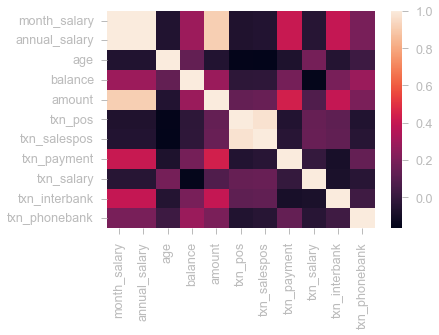

In [71]:
# Check the correlation again
cust_corr = cust_salary.corr()
print(cust_corr)
sns.heatmap(cust_corr)

In [72]:
# cust_corr.unstack()
cust_corr_pairs = cust_corr.unstack().sort_values()
pd.DataFrame(cust_corr_pairs[(cust_corr_pairs>0.3) & (cust_corr_pairs<1)]).reset_index()

,level_0,level_1,0
0,txn_interbank,annual_salary,0.396109
1,annual_salary,txn_interbank,0.396109
2,txn_interbank,month_salary,0.396109
3,month_salary,txn_interbank,0.396109
4,amount,txn_interbank,0.398977
5,txn_interbank,amount,0.398977
6,month_salary,txn_payment,0.405392
7,txn_payment,month_salary,0.405392
8,annual_salary,txn_payment,0.405392
9,txn_payment,annual_salary,0.405392


    3	txn_interbank	month_salary	0.396109
    4	txn_interbank	amount	0.398977

    6	txn_payment	month_salary	0.405392
    10	txn_payment	amount	0.435576

    14	amount	month_salary	0.911797

    16	txn_pos	txn_salespos	0.970999

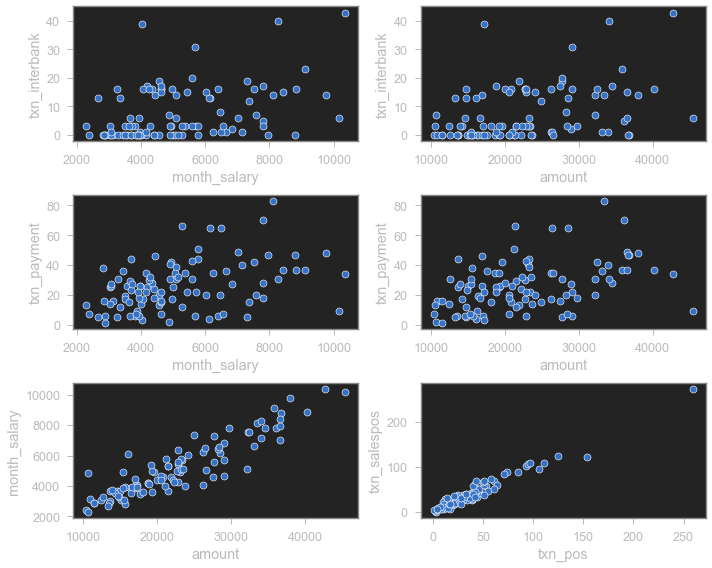

In [73]:
fig, ax = plt.subplots(3, 2, figsize = (10, 8))
ax[0,0] = sns.scatterplot(data = cust_salary, x = 'month_salary', y = 'txn_interbank', ax = ax[0,0])
ax[0,1] = sns.scatterplot(data = cust_salary, x = 'amount', y = 'txn_interbank', ax = ax[0,1])
ax[1,0] = sns.scatterplot(data = cust_salary, x = 'month_salary', y = 'txn_payment', ax = ax[1,0])
ax[1,1] = sns.scatterplot(data = cust_salary, x = 'amount', y = 'txn_payment', ax = ax[1,1])
ax[2,0] = sns.scatterplot(data = cust_salary, x = 'amount', y = 'month_salary', ax = ax[2,0])
ax[2,1] = sns.scatterplot(data = cust_salary, x = 'txn_pos', y = 'txn_salespos', ax = ax[2,1])
plt.tight_layout()
plt.show()

# 3. Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

# 4. How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

# 5. For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [ ]:
cust = df.groupby(['customer_id', 'txn_description', 'month_name'])['amount'].sum().reset_index()
# cust_salary = cust[salary['txn_description'] == 'PAY/SALARY'] 
cust_salary = df.groupby(['txn_description', 'customer_id', 'month_name'])['amount'].sum()#.unstack().sort_values(['customer_id', 'PAY/SALARY'])
# cust_salary.columns # ['INTER BANK', 'PAY/SALARY', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS']
# cust_salary.drop(columns = ['INTER BANK', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS'], inplace = True)
# cust_salary = cust_salary.reset_index()
cust_salary = pd.DataFrame(cust_salary)
cust_salary = cust_salary.drop(['INTER BANK', 'PAYMENT', 'PHONE BANK', 'POS', 'SALES-POS'])
cust_salary = cust_salary.reset_index()